Problem - 1: Perform a classification task with knn from scratch.
1. Load the Dataset:
• Read the dataset into a pandas DataFrame.
• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).
2. Handle Missing Data:
• Handle any missing values appropriately, either by dropping or imputing them based on the data.
3. Feature Engineering:
• Separate the feature matrix (X) and target variable (y).
• Perform a train - test split from scratch using a 70% − 30% ratio.
4. Implement KNN:
• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).
• Compute distances using Euclidean distance.
• Write functions for:
– Predicting the class for a single query.
– Predicting classes for all test samples.
• Evaluate the performance using accuracy.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("\n")
print("1.  Load the Dataset")
print("\n")

data = pd.read_csv("/content/drive/MyDrive/Untitled folder/diabetes_.csv")

print(data.head())
print(data.info())
print(data.describe())
print(data.isnull().sum())


print("\n")
print("2. Handle Missing Data")
print("\n")

for column in data.columns:
    if data[column].isnull().sum() > 0:
        data[column].fillna(data[column].mean(), inplace=True)

print(data.isnull().sum())


print("\n")
print("3. Feature Engineering")
print("\n")

X = data.drop(columns=["Outcome"]).values
y = data["Outcome"].values


def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    split = int(len(X) * test_size)
    test_idx = indices[:split]
    train_idx = indices[split:]

    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]


X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


print("\n")
print("4. Implement KNN")
print("\n")


def euclidean_distance(p1, p2):
    if p1.shape != p2.shape:
        raise ValueError("Dimension mismatch")
    return np.sqrt(np.sum((p1 - p2) ** 2))


def knn_predict_single(query, X_train, y_train, k):
    distances = []

    for i in range(len(X_train)):
        dist = euclidean_distance(query, X_train[i])
        distances.append(dist)

    nearest_indices = np.argsort(distances)[:k]
    nearest_labels = y_train[nearest_indices]

    prediction = np.bincount(nearest_labels).argmax()
    return prediction


def knn_predict(X_test, X_train, y_train, k):
    predictions = []
    for x in X_test:
        predictions.append(knn_predict_single(x, X_train, y_train, k))
    return np.array(predictions)


def compute_accuracy(y_true, y_pred):
    return (np.sum(y_true == y_pred) / len(y_true)) * 100


predictions = knn_predict(X_test, X_train, y_train, k=3)
accuracy = compute_accuracy(y_test, predictions)

print(f"Accuracy of kNN (k=3) on Unscaled Data: {accuracy:.2f}%")




1.  Load the Dataset


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Gluc

Problem - 2 - Experimentation:
1. Repeat the Classification Task:
• Scale the Feature matrix X.
• Use the scaled data for training and testing the kNN Classifier.
• Record the results.
2. Comparative Analysis: Compare the Results -
• Compare the accuracy and performance of the kNN model on the original dataset from problem 1
versus the scaled dataset.
• Discuss:
– How scaling impacted the KNN performance.
– The reason for any observed changes in accuracy.

In [ ]:
def min_max_scaling(X):
    X_min = X.min(axis=0)
    X_max = X.max(axis=0)
    return (X - X_min) / (X_max - X_min)


X_scaled = min_max_scaling(X)


X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)

pred_unscaled = knn_predict(X_test, X_train, y_train, k=3)
accuracy_unscaled = compute_accuracy(y_test, pred_unscaled)



X_train_s, X_test_s, y_train_s, y_test_s = train_test_split_scratch(X_scaled, y)

pred_scaled = knn_predict(X_test_s, X_train_s, y_train_s, k=3)
accuracy_scaled = compute_accuracy(y_test_s, pred_scaled)

print(f"Accuracy on Unscaled Data (k=3): {accuracy_unscaled:.2f}%")
print(f"Accuracy on Scaled Data   (k=3): {accuracy_scaled:.2f}%")




Accuracy on Unscaled Data (k=3): 67.39%
Accuracy on Scaled Data   (k=3): 69.13%


Problem - 3 - Experimentation with k:
1. Vary the number of neighbors - k:
• Run the KNN model on both the original and scaled datasets for a range of:

k= 1, 2, 3, . . . 15

• For each k, record:
– Accuracy.
– Time taken to make predictions.
2. Visualize the Results:
• Plot the following graphs:
– k vs. Accuracy for original and scaled datasets.
– k vs. Time Taken for original and scaled datasets.
3. Analyze and Discuss:
• Discuss how the choice of k affects the accuracy and computational cost.
• Identify the optimal k based on your analysis.

----- Original Dataset Results -----
k=1 | Accuracy=68.70% | Time=0.939347s
k=2 | Accuracy=72.61% | Time=1.522459s
k=3 | Accuracy=67.39% | Time=1.515273s
k=4 | Accuracy=72.17% | Time=1.300493s
k=5 | Accuracy=68.70% | Time=0.908821s
k=6 | Accuracy=70.00% | Time=0.947219s
k=7 | Accuracy=69.13% | Time=0.911161s
k=8 | Accuracy=71.30% | Time=0.862743s
k=9 | Accuracy=70.00% | Time=0.916247s
k=10 | Accuracy=71.74% | Time=2.041885s
k=11 | Accuracy=73.04% | Time=0.984937s
k=12 | Accuracy=73.91% | Time=0.872694s
k=13 | Accuracy=74.35% | Time=0.910316s
k=14 | Accuracy=72.61% | Time=1.294807s
k=15 | Accuracy=73.91% | Time=1.554614s

----- Scaled Dataset Results -----
k=1 | Accuracy=67.39% | Time=1.528401s
k=2 | Accuracy=67.83% | Time=0.966769s
k=3 | Accuracy=69.13% | Time=0.888378s
k=4 | Accuracy=69.57% | Time=0.908580s
k=5 | Accuracy=67.83% | Time=0.881157s
k=6 | Accuracy=66.52% | Time=0.885844s
k=7 | Accuracy=71.30% | Time=0.877103s
k=8 | Accuracy=69.57% | Time=0.894743s
k=9 | Accuracy=72.17% | 

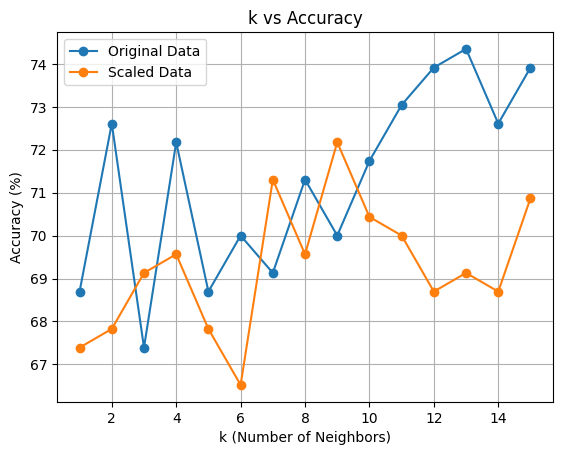

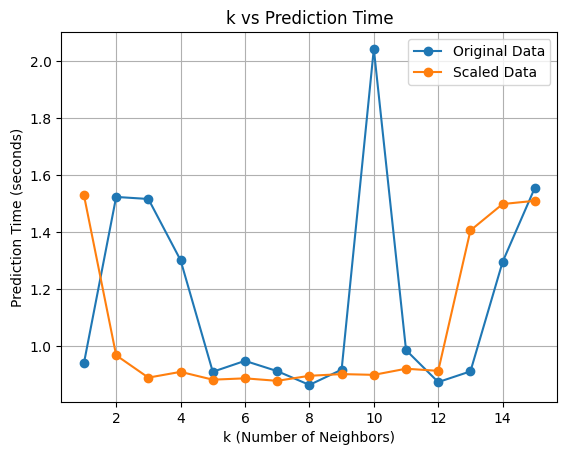

----- Optimal k Values -----
Best k (Original Data): 13
Best k (Scaled Data): 9


In [ ]:
import time


def evaluate_knn_k_values(X_train, y_train, X_test, y_test, k_values):
    accuracies = []
    times = []

    for k in k_values:
        start_time = time.time()

        predictions = knn_predict(X_test, X_train, y_train, k)

        end_time = time.time()

        accuracy = compute_accuracy(y_test, predictions)
        time_taken = end_time - start_time

        accuracies.append(accuracy)
        times.append(time_taken)

        print(f"k={k} | Accuracy={accuracy:.2f}% | Time={time_taken:.6f}s")

    return accuracies, times



k_values = range(1, 16)

print("----- Original Dataset Results -----")
acc_original, time_original = evaluate_knn_k_values(
    X_train, y_train, X_test, y_test, k_values
)



print("\n----- Scaled Dataset Results -----")
acc_scaled, time_scaled = evaluate_knn_k_values(
    X_train_s, y_train_s, X_test_s, y_test_s, k_values
)



import matplotlib.pyplot as plt

plt.figure()
plt.plot(k_values, acc_original, marker='o', label="Original Data")
plt.plot(k_values, acc_scaled, marker='o', label="Scaled Data")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy (%)")
plt.title("k vs Accuracy")
plt.legend()
plt.grid()
plt.show()



plt.figure()
plt.plot(k_values, time_original, marker='o', label="Original Data")
plt.plot(k_values, time_scaled, marker='o', label="Scaled Data")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Prediction Time (seconds)")
plt.title("k vs Prediction Time")
plt.legend()
plt.grid()
plt.show()



best_k_original = k_values[acc_original.index(max(acc_original))]
best_k_scaled = k_values[acc_scaled.index(max(acc_scaled))]

print("----- Optimal k Values -----")
print(f"Best k (Original Data): {best_k_original}")
print(f"Best k (Scaled Data): {best_k_scaled}")
